In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Suppress specific MLflow warnings
warnings.filterwarnings("ignore", message="Input example should be provided to infer model signature if the model signature is not provided when logging the model.")
warnings.filterwarnings("ignore", message="Input example should be provided to infer model signature")

In [2]:
# Load the dataset
file_path = '02_mushroom_species_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows and basic info about the dataset
data.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
# 1. Missing Values Analysis
missing_values = data.isnull().sum()
missing_values

class                         0
cap-shape                     0
cap-surface                   0
cap-color                     0
bruises                       0
odor                          0
gill-attachment               0
gill-spacing                  0
gill-size                     0
gill-color                    0
stalk-shape                   0
stalk-root                    0
stalk-surface-above-ring      0
stalk-surface-below-ring      0
stalk-color-above-ring        0
stalk-color-below-ring        0
veil-type                     0
veil-color                    0
ring-number                   0
ring-type                     0
spore-print-color             0
population                    0
habitat                     192
dtype: int64

I checked for missing values using .isnull.sum(). I found 192 values missing in habitat columns. 

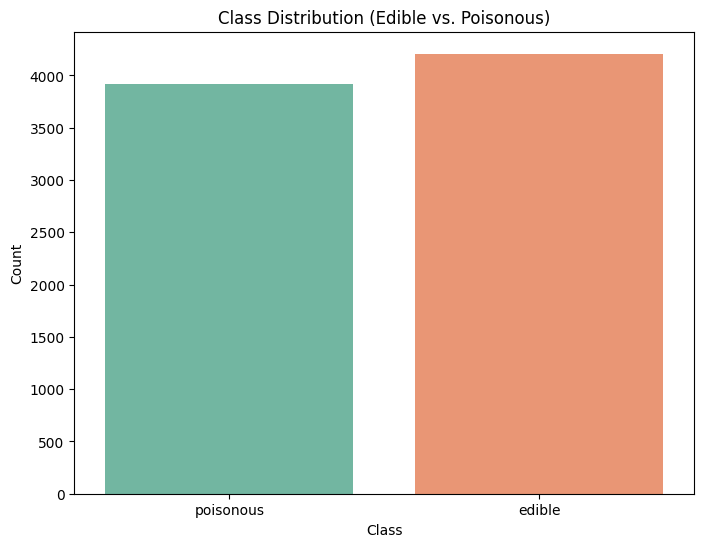

class
edible       4208
poisonous    3916
Name: count, dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Class Distribution
class_distribution = data['class'].value_counts()

# 3. Visualizing Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data, palette='Set2')
plt.title('Class Distribution (Edible vs. Poisonous)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

class_distribution

The graph shows the class distribution of edible and poisonous mushrooms. The x-axis represents the class (edible or poisonous), while the y-axis indicates the count of mushrooms within each class. From the visualization, it is evident that there is a significant imbalance in the distribution. The number of poisonous mushrooms is approximately 3900, whereas the number of edible mushrooms is around 4100. This implies that the dataset contains a slightly higher proportion of edible mushrooms compared to poisonous ones, but overall the target data is quite balance.

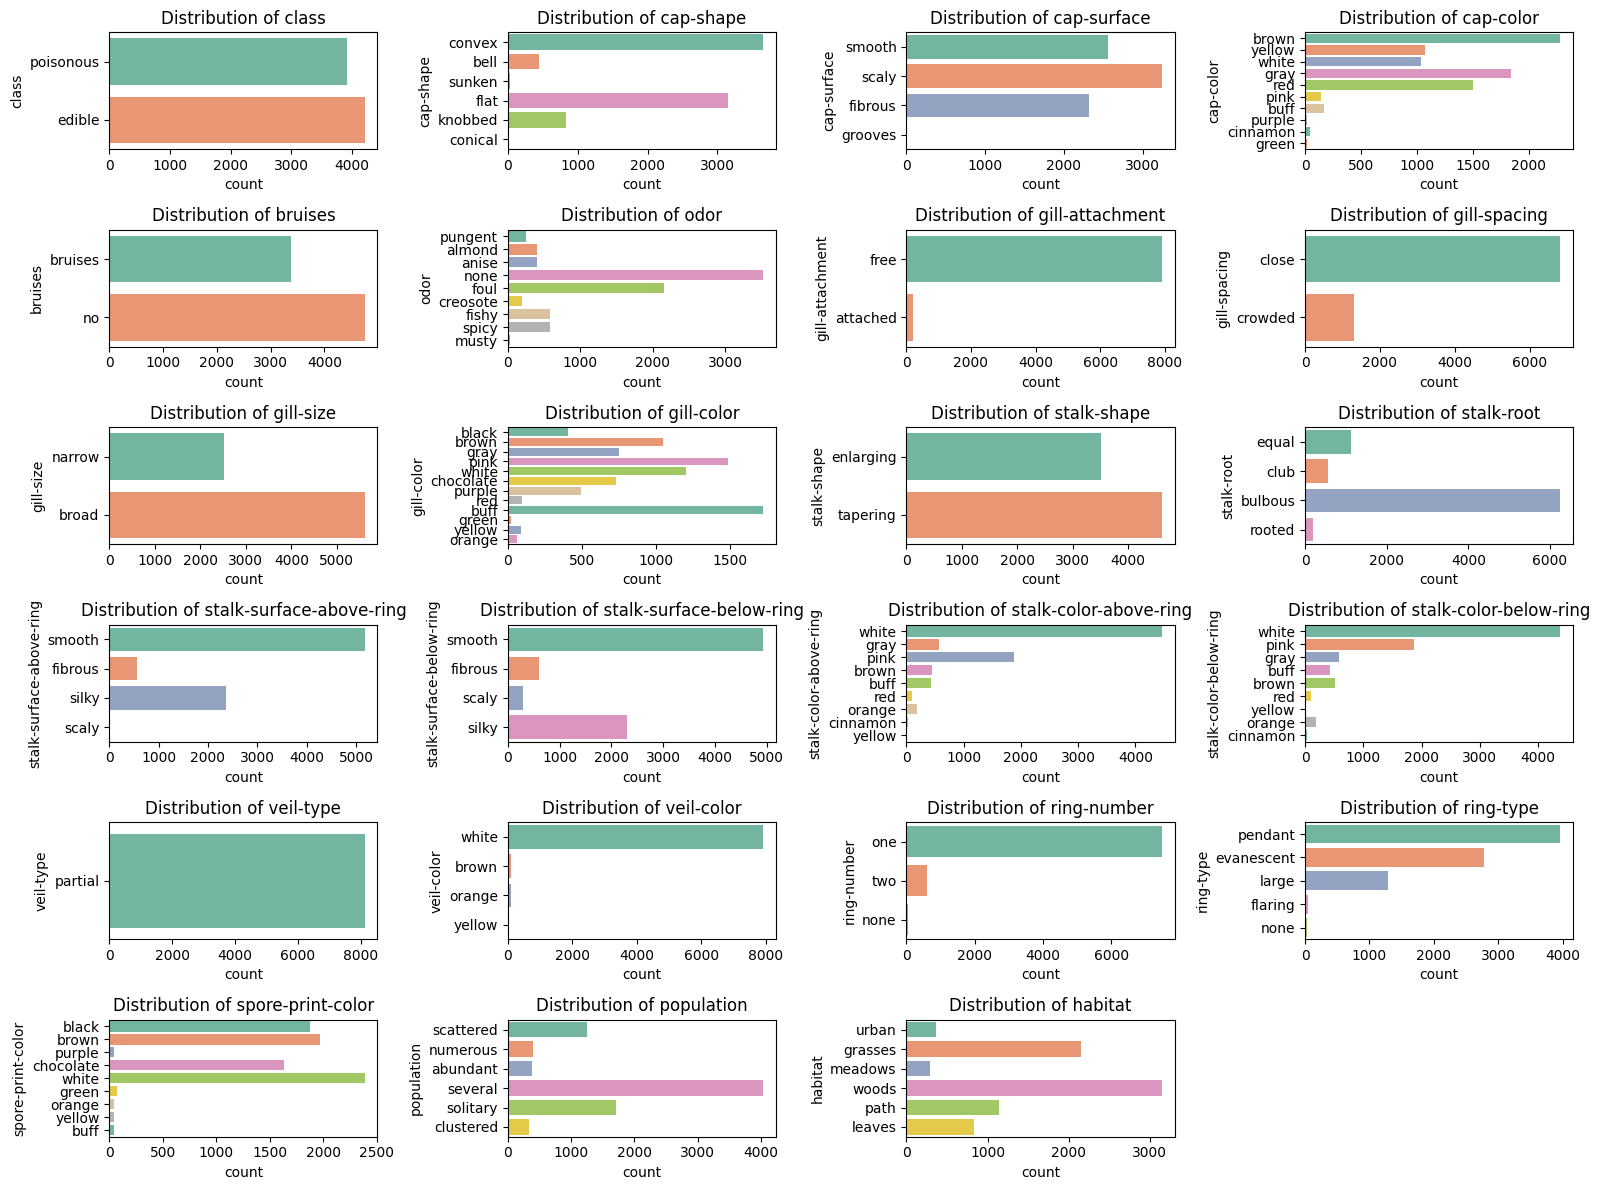

In [6]:
# Set up the plotting environment
plt.figure(figsize=(16, 12))

# Plotting the distribution of each categorical feature
for i, column in enumerate(data.columns):
    plt.subplot(6, 4, i + 1)
    sns.countplot(y=column, data=data, palette='Set2')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

This graph shows the distribution of various features from a dataset. The class distribution is fairly balanced, though there are slightly more edible samples. Notable features include bruises, where a higher count of non-bruised mushrooms appears in both classes; gill-size, with broad gills being more common; and stalk-root, where most mushrooms have equal stalks. The odor feature shows a significant variation, with specific odors strongly associated with one class. Cap shape, color, and surface also exhibit diverse distributions, indicating they may play a significant role in classification. Several features, like veil-type and veil-color, have low variance, suggesting they might be less informative for distinguishing between the classes. Overall, the dataset contains a mix of categorical features with varying distributions, which may influence the classification model's performance.

In [7]:
from sklearn.preprocessing import LabelEncoder

# # getting object columns
# cat_cols = data.select_dtypes(include = ['object']).columns

# # encode values
# le = LabelEncoder()
# for col in cat_cols: 
#     le.fit(data[col])
#     data[col] = le.transform(data[col])

cat_cols = data.select_dtypes(include=['object']).columns

# Create a copy of the dataset
data_copy = data.copy()

# Encode values in the copy
le = LabelEncoder()
for col in cat_cols: 
    data_copy[col] = le.fit_transform(data_copy[col])



<Axes: >

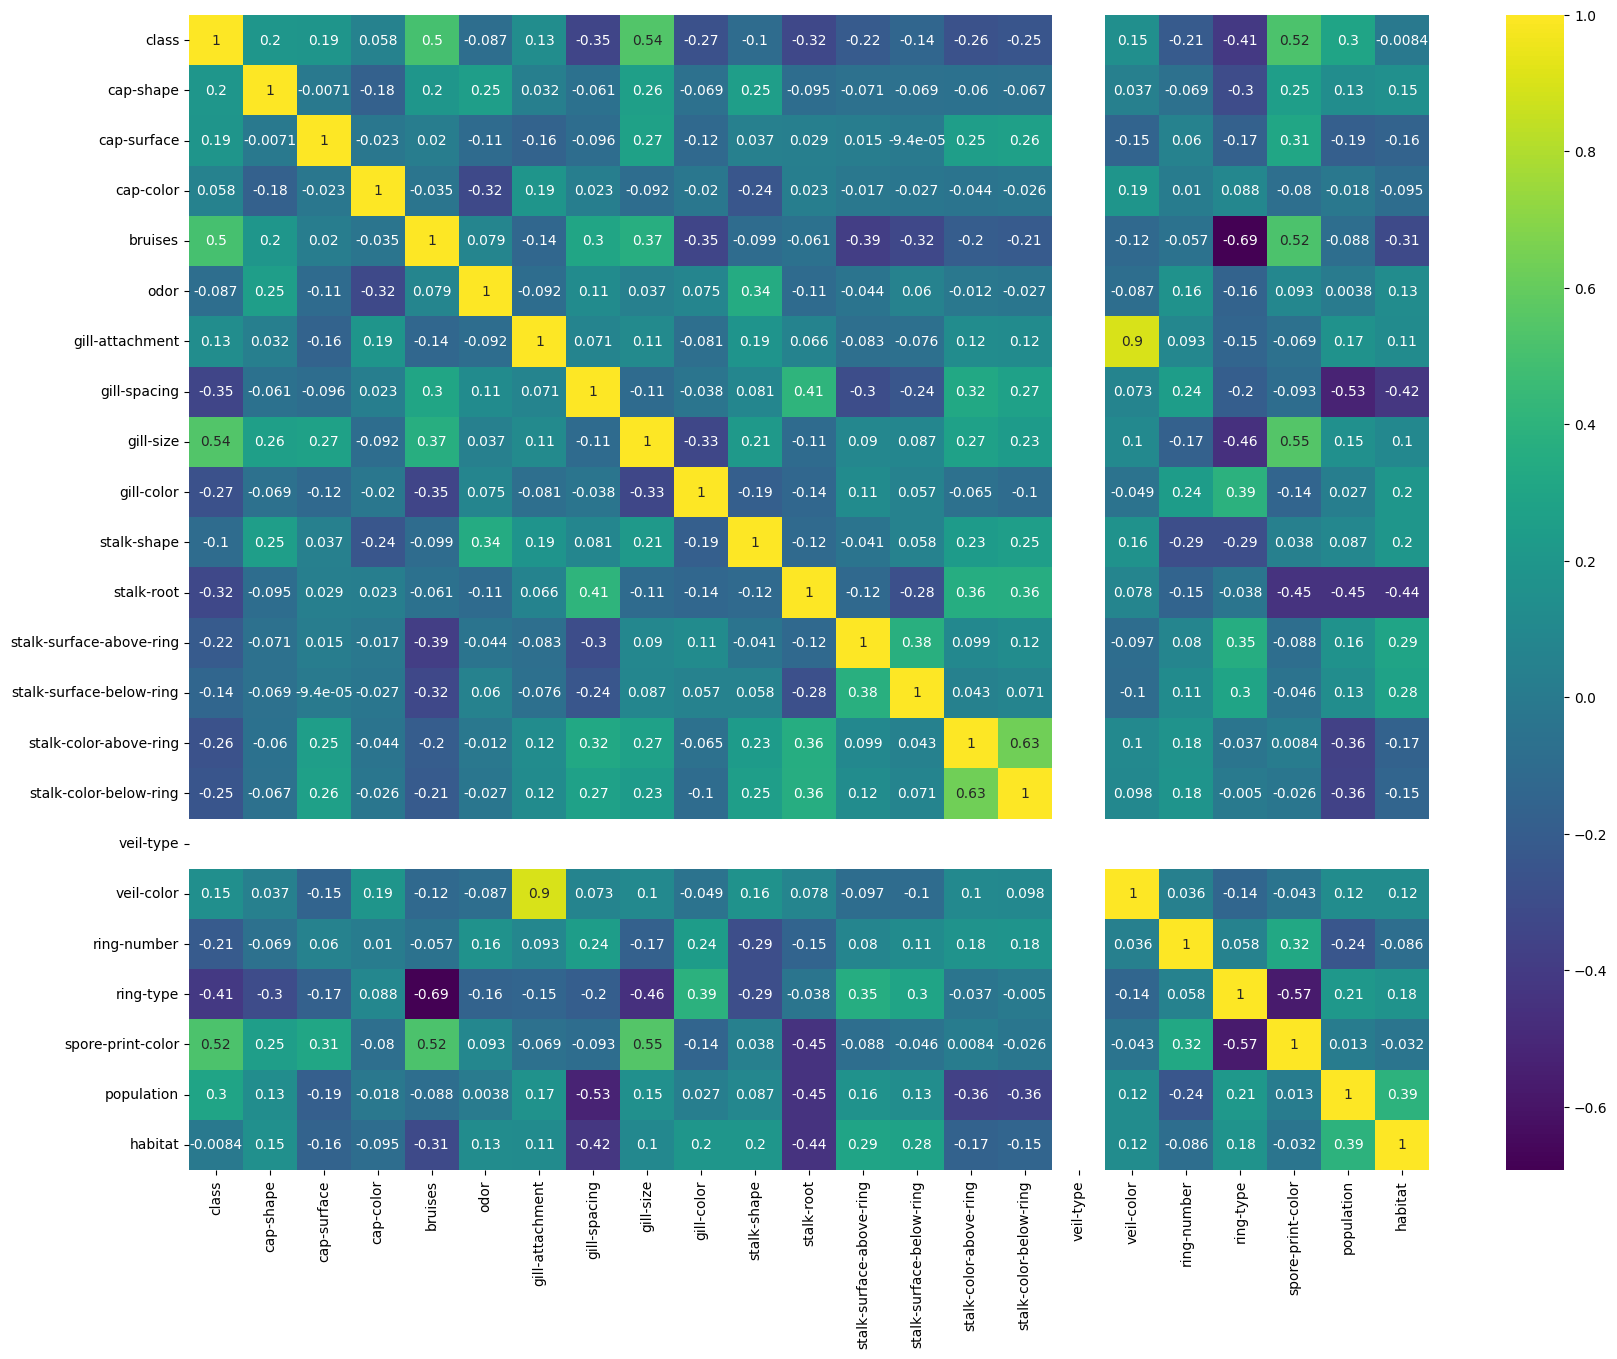

In [8]:
plt.figure(figsize = (20, 15))
sns.heatmap(data_copy.corr(), annot = True, cmap = 'viridis')

The correlation matrix shows the relationships between various features of mushrooms. The analysis reveals that certain features, such as odor, gill-spacing, and spore-print-color, exhibit strong correlations with the mushroom class. Additionally, the matrix indicates that specific characteristics, like odor and gill-size, are closely related to each other. Overall, the correlation matrix provides valuable insights into the interdependence of mushroom attributes, potentially aiding in their classification and identification.

In [9]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


## Build Model

In [10]:
import mlflow
from pycaret.classification import *

# Set up MLflow tracking
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Select the columns you want to use for training
selected_columns = ['class', 'odor', 'gill-size', 'gill-color', 'cap-color','bruises', 'spore-print-color', 'gill-spacing', 'ring-type', 'stalk-surface-above-ring']

# Filter the data to include only the selected columns
filtered_data = data[selected_columns]

# Set up the PyCaret experiment with the selected columns
clf1 = setup(filtered_data, target='class',
             session_id=123,
             categorical_imputation='drop',
             pca=True,
             log_experiment=True,
             experiment_name='mushroom')

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Target mapping,"edible: 0, poisonous: 1"
4,Original data shape,"(8124, 10)"
5,Transformed data shape,"(8124, 53)"
6,Transformed train set shape,"(5686, 53)"
7,Transformed test set shape,"(2438, 53)"
8,Categorical features,9
9,Preprocess,True


There are nine categorical features that are selected for training, and data preprocessing is enabled. Categorical imputation is handled by dropping missing values, while numeric imputation is done using the mean. The data includes 8,124 samples, which is transformed into a training set of 5,686 samples and a test set of 2,438 samples. One-hot encoding is applied to a maximum of 25 categories. Principal Component Analysis (PCA) is applied with a linear method, though the number of components is not specified as i use the default component which is 0.99. The experiment employs a 10-fold stratified cross-validation (StratifiedKFold), and logging is set up with MLflow for experiment tracking. The experiment is named "mushroom" and is identified by a unique session ID.

In [11]:
clf1.data.dtypes

odor                        category
gill-size                   category
gill-color                  category
cap-color                   category
bruises                     category
spore-print-color           category
gill-spacing                category
ring-type                   category
stalk-surface-above-ring    category
class                       category
dtype: object

In [12]:
clf1.get_config('dataset_transformed')

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca43,pca44,pca45,pca46,pca47,pca48,pca49,pca50,pca51,class
1287,0.084044,0.105314,1.920059,-0.683723,0.250588,0.313630,-0.082443,-0.273771,-0.336473,-0.368862,...,0.005073,-5.613409e-16,2.032573e-15,-1.774289e-16,-1.789870e-15,8.623177e-18,3.173805e-16,1.942890e-16,-3.018419e-16,0
6411,1.763394,-0.761614,-0.168829,0.434376,0.471815,-0.260772,0.021935,-0.125816,0.167511,0.108275,...,0.002808,-1.831159e-15,1.449706e-15,2.098528e-15,2.501648e-16,-5.742439e-16,-4.320201e-16,-6.938894e-16,1.734723e-18,1
4564,1.270270,1.675087,-0.300710,0.189924,0.158848,0.264207,-0.453728,0.074649,-0.230450,0.329622,...,-0.000638,-7.278744e-16,-4.760604e-15,1.545152e-15,9.162986e-16,9.188990e-17,-3.209977e-16,4.440892e-16,-6.505213e-17,1
3565,1.202284,1.682547,-0.196060,0.174118,0.146116,0.111323,0.029592,0.877732,0.253326,0.064778,...,-0.001646,-2.615254e-15,4.019327e-16,6.847287e-16,-3.049467e-16,2.029122e-16,-2.932422e-16,2.498002e-16,-2.020953e-16,1
3892,1.206084,1.694072,0.070674,-0.113181,-0.089167,-0.277572,0.207303,-0.607987,-0.191701,0.183602,...,0.000420,-6.168521e-16,-5.232449e-15,1.600663e-15,1.138343e-15,6.413433e-17,-1.544643e-16,4.440892e-16,-2.844947e-16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,-1.201686,0.003398,-0.151179,-0.990379,0.053520,-0.298971,0.116626,1.056526,0.153474,0.083764,...,0.001366,-2.213351e-16,6.395899e-16,-5.807521e-16,-7.247498e-16,-4.688797e-17,1.508470e-16,-4.234003e-16,8.466567e-17,0
2941,-1.290821,-0.166325,-0.092981,0.878240,0.022654,-0.647641,-0.135038,0.119173,-0.201075,0.071945,...,-0.000377,5.072487e-16,-1.226973e-15,-1.279893e-16,-3.639273e-16,-3.105659e-16,5.671807e-16,-9.033341e-17,1.471157e-16,0
1296,-1.290821,-0.166325,-0.092981,0.878240,0.022654,-0.647641,-0.135038,0.119173,-0.201075,0.071945,...,-0.000377,5.072487e-16,-1.226973e-15,-1.279893e-16,-3.639273e-16,-3.105659e-16,5.671807e-16,-9.033341e-17,1.471157e-16,0
4656,1.202284,1.682547,-0.196060,0.174118,0.146116,0.111323,0.029592,0.877732,0.253326,0.064778,...,-0.001646,-2.615254e-15,4.019327e-16,6.847287e-16,-3.049467e-16,2.029122e-16,-2.932422e-16,1.941612e-16,-2.011300e-16,1


## Train Model

In [27]:
# Compare models and select the best one
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0950
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2200
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2520
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5650
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1720
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1660
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3260
catboost,CatBoost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,5.4850
knn,K Neighbors Classifier,0.9998,1.0000,0.9998,0.9998,0.9998,0.9996,0.9996,0.0970
dt,Decision Tree Classifier,0.9998,0.9998,0.9998,0.9998,0.9998,0.9996,0.9996,0.0880


2024/08/23 18:20:49 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/23 18:20:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run SVM - Linear Kernel at: http://127.0.0.1:5000/#/experiments/800801839323383365/runs/6972ac63699a49a384937459c4c83cce.
2024/08/23 18:20:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/800801839323383365.
2024/08/23 18:20:50 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/23 18:20:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest Classifier at: http://127.0.0.1:5000/#/experiments/800801839323383365/runs/22176f990dd9457fa07fe3c7d150ca05.
2024/08/23 18:20:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/exper

The models, including SVM, Random Forest, AdaBoost, Gradient Boosting, Extra Trees, and several others, all achieve perfect scores across multiple metrics: accuracy, AUC (Area Under the Curve), recall, precision, F1 score, Kappa, and MCC (Matthews correlation coefficient), with all values being 1. This indicates that the models are perfectly classifying the mushrooms as either edible or poisonous on the given dataset. The training time (TT) in seconds for each model is also listed, showing that some models, like SVM and Logistic Regression, are faster, while others like CatBoost take longer.

The reason for the perfect scores could be due to the nature of the dataset, which might be highly separable, meaning the features chosen for classification are very effective in distinguishing between the classes. Additionally, the dataset may have clear and distinct patterns that make it easier for most models to achieve 100% accuracy. This could also indicate that the dataset might not be very challenging, or it could suggest potential issues like data leakage, where information from the test set is inadvertently used in the training process, leading to overly optimistic performance metrics. However, given the number of different models achieving this, it is more likely that the dataset is inherently easy to classify with the selected features.

## Model Evaluation

In [14]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

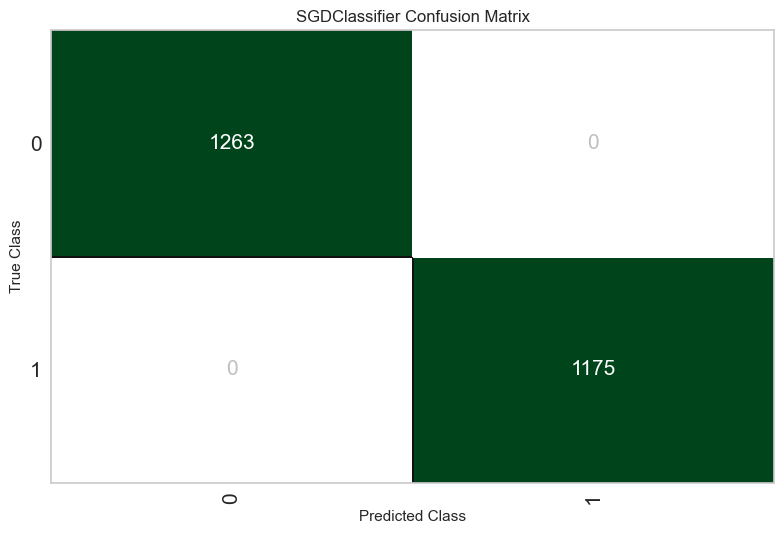

In [15]:
# plot_model(best_model, plot='auc')
plot_model(best_model, plot='confusion_matrix')


The confusion matrix shows that the classification model achieved perfect performance, correctly identifying all 1,263 edible mushrooms (class 0) and all 1,175 poisonous mushrooms (class 1). There were no misclassifications, as indicated by zero false positives and zero false negatives. This result supports the earlier observation that the dataset is highly separable, allowing the model to distinguish between the two classes with complete accuracy.

## Prediction

In [16]:
# predict on test set
holdout_pred = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,1.0000,0,1.0000,1.0000,1.0000,1.0000,1.0000


In [17]:
# show predictions df
holdout_pred.head()

,odor,gill-size,gill-color,cap-color,bruises,spore-print-color,gill-spacing,ring-type,stalk-surface-above-ring,class,prediction_label
3370,none,broad,white,brown,bruises,black,close,pendant,smooth,edible,edible
4466,foul,broad,chocolate,gray,no,chocolate,close,large,silky,poisonous,poisonous
4232,foul,broad,pink,white,bruises,chocolate,close,pendant,fibrous,poisonous,poisonous
5058,foul,broad,white,buff,bruises,chocolate,close,pendant,smooth,poisonous,poisonous
6305,foul,narrow,buff,red,no,white,close,evanescent,silky,poisonous,poisonous


In [18]:
new_data = data.copy()
new_data = new_data[['odor', 'gill-size', 'gill-color', 'cap-color','bruises', 'spore-print-color', 'gill-spacing', 'ring-type', 'stalk-surface-above-ring']].copy()
new_data.head()

,odor,gill-size,gill-color,cap-color,bruises,spore-print-color,gill-spacing,ring-type,stalk-surface-above-ring
0,pungent,narrow,black,brown,bruises,black,close,pendant,smooth
1,almond,broad,black,yellow,bruises,brown,close,pendant,smooth
2,anise,broad,brown,white,bruises,brown,close,pendant,smooth
3,pungent,narrow,brown,white,bruises,black,close,pendant,smooth
4,none,broad,black,gray,no,brown,crowded,evanescent,smooth


In [19]:
predictions = predict_model(best_model, data = new_data)
predictions.head()

,odor,gill-size,gill-color,cap-color,bruises,spore-print-color,gill-spacing,ring-type,stalk-surface-above-ring,prediction_label
0,pungent,narrow,black,brown,bruises,black,close,pendant,smooth,poisonous
1,almond,broad,black,yellow,bruises,brown,close,pendant,smooth,edible
2,anise,broad,brown,white,bruises,brown,close,pendant,smooth,edible
3,pungent,narrow,brown,white,bruises,black,close,pendant,smooth,poisonous
4,none,broad,black,gray,no,brown,crowded,evanescent,smooth,edible


In [20]:
final_model = finalize_model(best_model)

# Save the model
save_model(final_model, 'mushroom_classifier')

2024/08/23 18:11:52 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/23 18:11:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run SVM - Linear Kernel at: http://127.0.0.1:5000/#/experiments/800801839323383365/runs/554ab550519b48bda922db3ce38afdf2.
2024/08/23 18:11:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/800801839323383365.


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('...
                 ('actual_estimator',
                  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                                e

In [21]:
loaded_model = load_model('mushroom_classifier')

Transformation Pipeline and Model Successfully Loaded


In [22]:
column_list = data.columns.tolist()

# Display the list of columns
print(column_list)

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
